<a href="https://colab.research.google.com/github/robertferro/analisando_risco_credito/blob/main/2-%20An%C3%A1lise%20explorat%C3%B3ria%20dos%20dados%20(EDA)/risco_de_credito_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados - Risco de crédito

### Identificar quais variáveis tem maior influência na classificação do empréstimo como sendo de risco ou não.

### Analisar o comportamento dessas variáveis em função do risco de crédito.


Neste notebook serã utilizados os dados já tratados anteriormente.

- Importando as bibliotecas que vão ser utilizadas para análise e visualização.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Carregando e exibindo os dados.

In [2]:
url='https://raw.githubusercontent.com/robertferro/analisando_risco_credito/main/1-%20Tratamento%20de%20dados%20(ETL)/dados_analise_risco_de_cresdito.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,tipo_moradia_id,objetivo_emprestimo,objetivo_emprestimo_id,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,class_risco_historico_id,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,21,5.0,propria,3,educacao,1,1000,11.14,9600,0.10,B,1,0,2,0
1,25,1.0,hipoteca,1,saude,5,5500,12.87,9600,0.57,C,2,0,3,1
2,23,4.0,alugada,0,saude,5,35000,15.23,65500,0.53,C,2,0,2,1
3,24,8.0,alugada,0,saude,5,35000,14.27,54400,0.55,C,2,1,4,1
4,21,2.0,propria,3,risco,4,2500,7.14,9900,0.25,A,0,0,2,1


- Utilizando a função info, podemos ver a quantidade de registros, bem como se há dados ausentes e o tipo das colunas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30881 entries, 0 to 30880
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         30881 non-null  int64  
 1   tempo_de_emprego              30881 non-null  float64
 2   tipo_moradia                  30881 non-null  object 
 3   tipo_moradia_id               30881 non-null  int64  
 4   objetivo_emprestimo           30881 non-null  object 
 5   objetivo_emprestimo_id        30881 non-null  int64  
 6   montante_emprestimo           30881 non-null  int64  
 7   taxa_juros                    30881 non-null  float64
 8   renda_por_ano                 30881 non-null  int64  
 9   porc_empr_renda_anual         30881 non-null  float64
 10  class_risco_historico         30881 non-null  object 
 11  class_risco_historico_id      30881 non-null  int64  
 12  inadimplencia_hist            30881 non-null  int64  
 13  q

# Iniciando a parte de análise exploratória dos dados e visualização(EDA)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,30881.0,27.374535,5.486967,20.00,23.00,26.000000,30.00,50.00
tempo_de_emprego,30881.0,4.692400,3.850170,0.00,2.00,4.000000,7.00,20.00
tipo_moradia_id,30881.0,0.642984,0.831202,0.00,0.00,0.000000,1.00,3.00
objetivo_emprestimo_id,30881.0,2.500405,1.755360,0.00,1.00,2.000000,4.00,5.00
montante_emprestimo,30881.0,9539.362391,6204.240704,500.00,5000.00,8000.000000,12000.00,35000.00
taxa_juros,30881.0,11.024071,3.066516,5.42,8.49,11.024071,13.11,23.22
renda_por_ano,30881.0,62607.105793,33041.239073,4000.00,39000.00,55000.000000,78000.00,200000.00
porc_empr_renda_anual,30881.0,0.171182,0.106168,0.01,0.09,0.150000,0.23,0.83
class_risco_historico_id,30881.0,1.221366,1.165912,0.00,0.00,1.000000,2.00,6.00
inadimplencia_hist,30881.0,0.177067,0.381731,0.00,0.00,0.000000,0.00,1.00


 Por meio da função describe do pandas, pode ser feita uma análise preliminar dos dados, podendo ter informações como a média das variáveis, desvio padrão, valor mínimo, valor máximo e a distribuição dos dados.

- Plotando a matriz de correlação.

  - Por meio da matriz de correlação é possível ver o quão as variáveis estão relacionadas com a variável alvo, no caso risco de crédito.

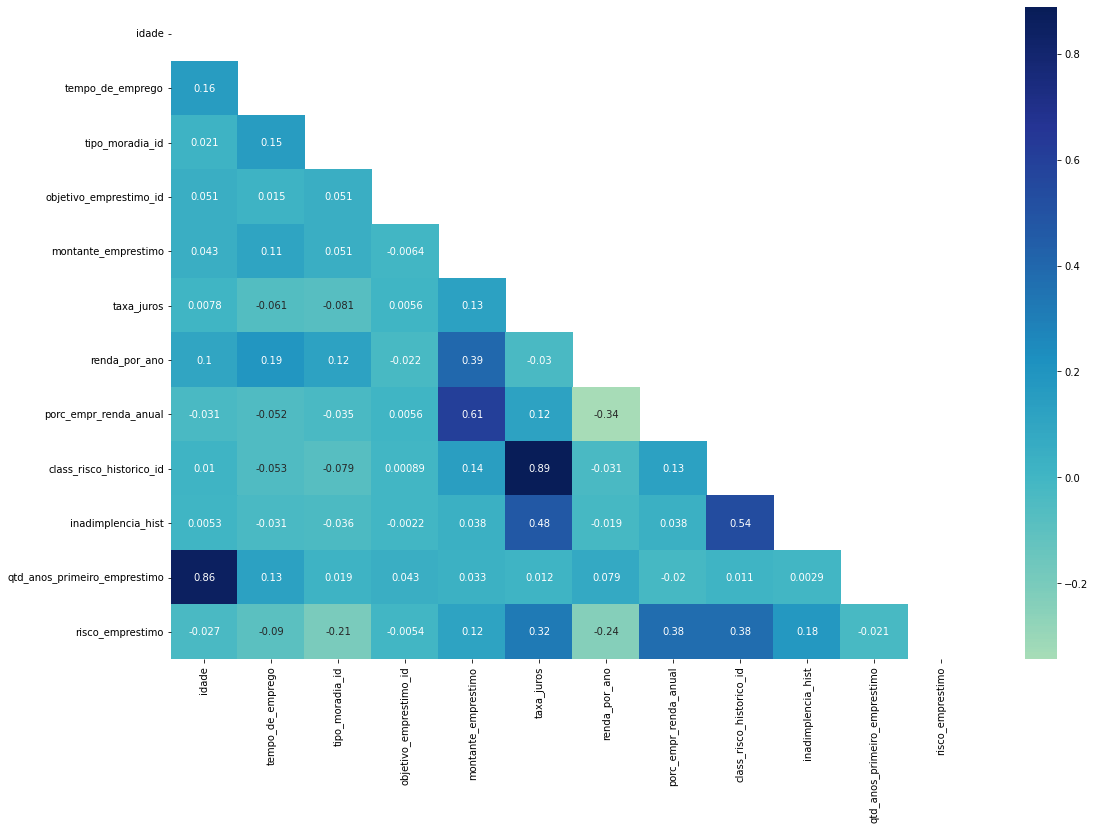

In [7]:
plt.figure(figsize=(18,12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

plt.show()

 Após analisar a matriz de correlação, é possível selecionar as variáveis que tem maior correlação com a variável **risco_emprestimo** e analisar alguns pontos.

##**Risco de empréstimo x Renda por ano x Tipo de Moradia**

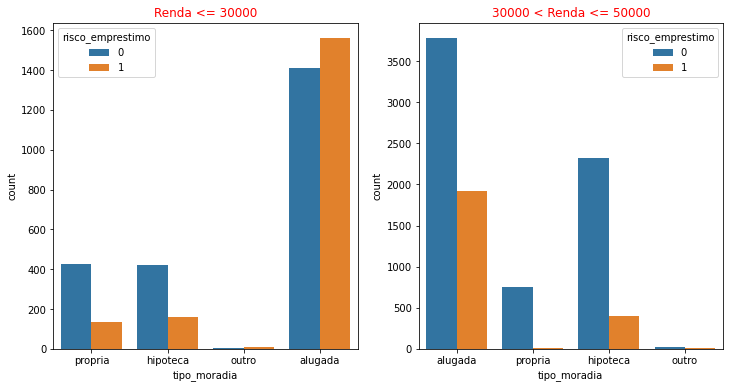

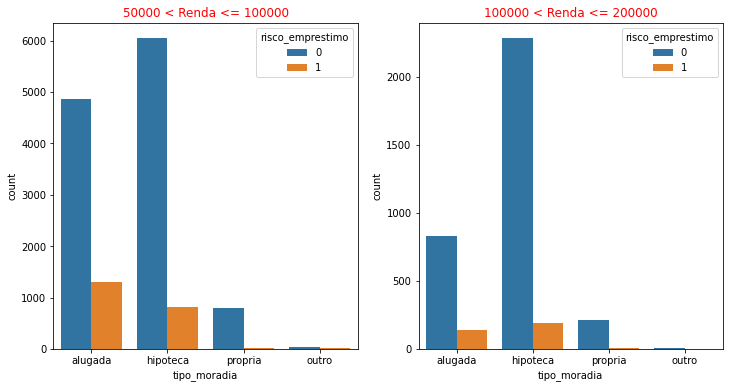

In [84]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='tipo_moradia',
              data=df[df['renda_por_ano']<=30000],
              hue='risco_emprestimo',
              ax=ax[0])
ax[0].set_title('Renda <= 30000', color='r')

sns.countplot(x='tipo_moradia', 
              data=df[(df['renda_por_ano']>30000)& 
                      (df['renda_por_ano']<=50000)],
              hue='risco_emprestimo',
              ax=ax[1])
ax[1].set_title('30000 < Renda <= 50000', color='r')


fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='tipo_moradia',
              data=df[(df['renda_por_ano']>50000)& 
                      (df['renda_por_ano']<=100000)],
              hue='risco_emprestimo',
              ax=ax[0])
ax[0].set_title('50000 < Renda <= 100000', color='r')

sns.countplot(x='tipo_moradia', 
              data=df[(df['renda_por_ano']>100000)& 
                      (df['renda_por_ano']<=200000)],
              hue='risco_emprestimo',
              ax=ax[1])
ax[1].set_title('100000 < Renda <= 200000', color='r')
plt.show()


Analisando os gráficos acima, pode-se concluir que:

 - O risco do empréstimo diminui conforme a renda  aumenta.
 - Pessoas que ganham entre 30k e 100 k são as que mais solicitam empréstimos.
 - Para renda abaixo de 30 k, pessoas com casa alugada são as que mais solicitam empréstimos e as que também apresentam maior quantidade de registros de empréstimos de risco.
 - A grande maioria dos empréstimos considerados de risco para pessoas com renda até 50k, são de pessoas que moram em casa alugada.
 - Para renda acima de 50k, quem mais solicita empréstimo tem casa hipotecada.
 - Para renda acima de 100 k, existe uma pequena quantidade de pessoas que solicitam empréstimos e também uma pequena quantidade considerada como sendo de risco.


Text(0.5, 1.0, '30000 < Renda <= 50000')

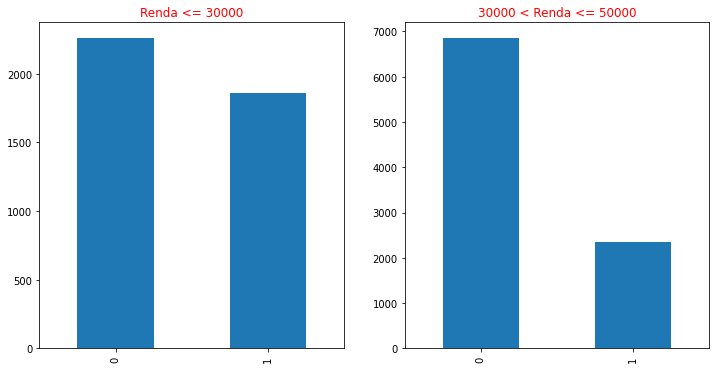

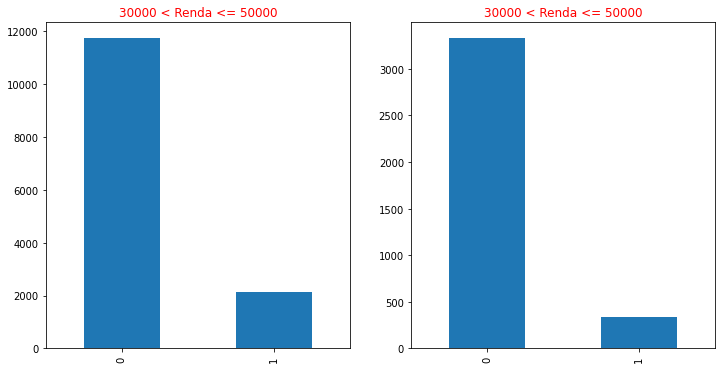

In [91]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
df[
   (df['renda_por_ano'] <=30000)].risco_emprestimo.value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_title('Renda <= 30000', color='r')

df[
   (df['renda_por_ano'] >30000)& 
   (df['renda_por_ano'] <=50000)].risco_emprestimo.value_counts().plot(kind='bar',ax=ax[1]);
ax[1].set_title('30000 < Renda <= 50000', color='r')


fig,ax = plt.subplots(1,2, figsize=(12,6))
df[
   (df['renda_por_ano'] >50000)& 
   (df['renda_por_ano'] <=100000)].risco_emprestimo.value_counts().plot(kind='bar',ax=ax[0]);
ax[0].set_title('30000 < Renda <= 50000', color='r')


df[
   (df['renda_por_ano'] >100000)& 
   (df['renda_por_ano'] <=200000)].risco_emprestimo.value_counts().plot(kind='bar',ax=ax[1]);
ax[1].set_title('30000 < Renda <= 50000', color='r')

Analisando os gráficos acima, pode-se concluir que:

 - Apesar de poucos registros de pessoas com renda menor que 30k que solicitam empréstimos, a risco de empréstimo é muito grande, chegando a quase 50% dos registros.
 - Para renda acima de 50k, a quantidade de empréstimos classificados como sendo de risco cai bastante.

# Tipo de moradia

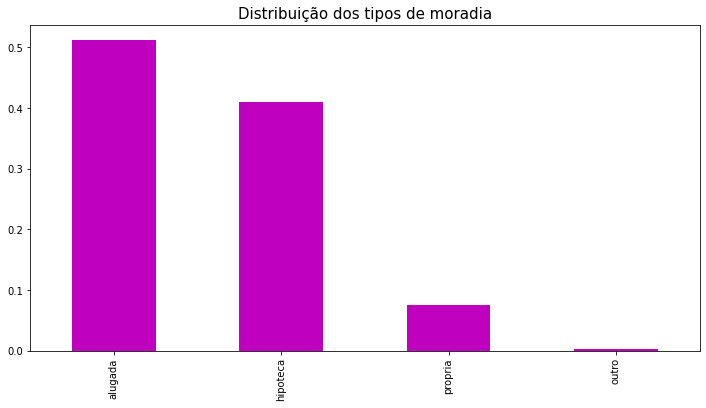

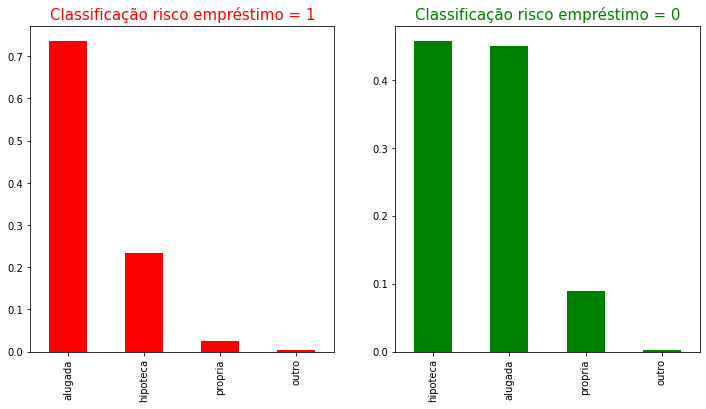

In [ ]:
df.tipo_moradia.value_counts(normalize=True).plot(kind='bar',color='m',figsize=(12,6))
plt.title('Distribuição dos tipos de moradia',fontsize=15)


fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] == 1 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15,color='r')

df[df['risco_emprestimo'] == 0 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15,color='green')

plt.show()

Analisando os graficos acimas podemos concluir que:

  De acordo com primeiro gráfico, que traz informações gerais sobre o dataset, podemos concluir que pessoas que tem moradia própria dificilmente solicitam empréstimo, representando menos de 10% dos empréstimos solicitados.
  
  Ainda olhando para o primeiro gráfico, pode-se concluir que pessoas que moram em casa alugada são as que mais solicitam empréstimos, ficando em torno de 50% dos empréstimos solicitados seguido por pessoas co casa hipotecada, com um pouco mais de 40% dos casos de empréstimo.
  
  Partindo para as análises de quando o empréstimo e considerado de risco ou não, pode ser observado que:
  
  - Quando o empréstimo é considerado de risco, em mais de 70% dos casos o tipo de moradia é alugada.
  - Pessoas com moradia própria possuem empréstimos classificados como de risco, ainda que em pequena quantidade, o que significa que outras variáveis devem ser consideradas na hora de avaliar um empréstimo como sendo de risco ou não.
  

# Inadimplência histórica

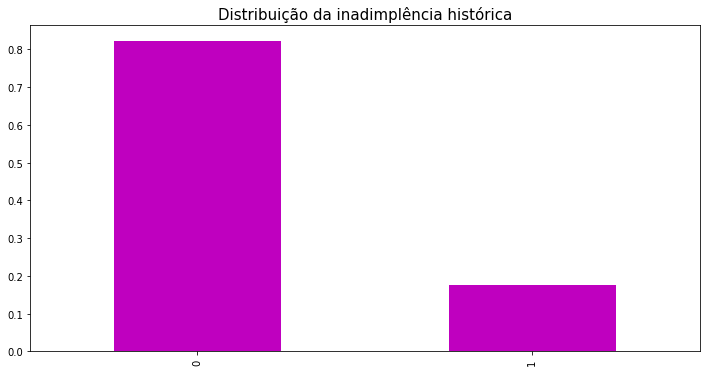

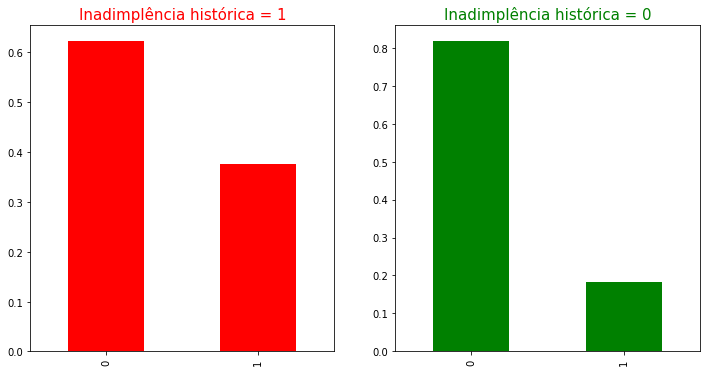

In [ ]:
df.inadimplencia_hist.value_counts(normalize=True).plot(kind='bar',color='m',figsize=(12,6))
plt.title('Distribuição da inadimplência histórica',fontsize=15)

fig, ax = plt.subplots(1,2, figsize=(12,6))


df[df['inadimplencia_hist'] ==1 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Inadimplência histórica = 1',fontsize=15, color='r')


df[df['inadimplencia_hist'] == 0 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Inadimplência histórica = 0',fontsize=15,color='green')



plt.show()

Analisando os gráficos acima pode-se concluir que :

 De acordo com o gráfico da distribuição da inadimplência histórica, que traz informações gerais sobre o dataset, podemos concluir que cerca de 20% das pessoas possui algum registro de inadimlência.
 
 Partindo para as análises de quando há histórico de inadimplência ou não, pode ser observado que:
    
   - Quando há histórico de inadimplência, existe também uma tendência maior do empréstimo ser classificado como de risco, chegando a um valor de quase 40% dos registros.
   - Quando não há histórico de inadimplência, a chance do empréstimo ser classificado como de risco cai quase que pela metade quando comparada quando há histórico de inadimplência.

# Taxa de juros empregada no empréstimo


# Porcentagem da renda anual

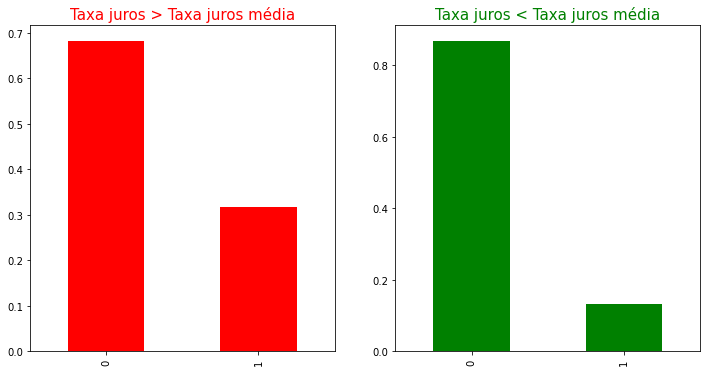

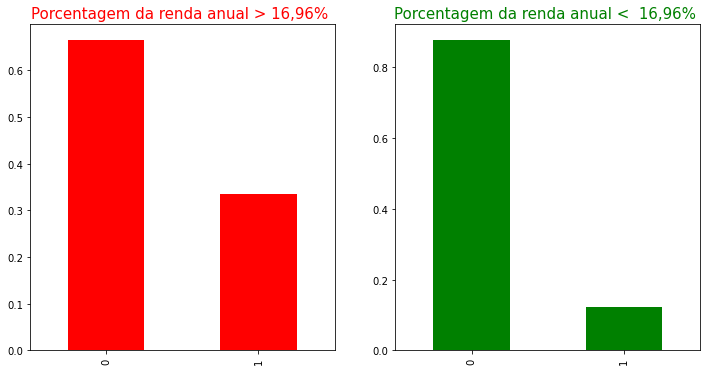

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['taxa_juros'] > 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Taxa juros > Taxa juros média',fontsize=15,color='red')


df[df['taxa_juros'] < 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Taxa juros < Taxa juros média',fontsize=15,color='green')




fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['porc_empr_renda_anual'] > 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Porcentagem da renda anual > 16,96% ',fontsize=15,color='red')

df[df['porc_empr_renda_anual'] < 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Porcentagem da renda anual <  16,96% ',fontsize=15,color='green')

plt.show()

Analisando os gráficos acimas pode-se concluir que :

- Quando a taxa de juros ou a porcentagem da renda anual são maiores que a média, aumenta também a chance do empréstimo ser classificado como de risco.

# Classificação de risco histórico

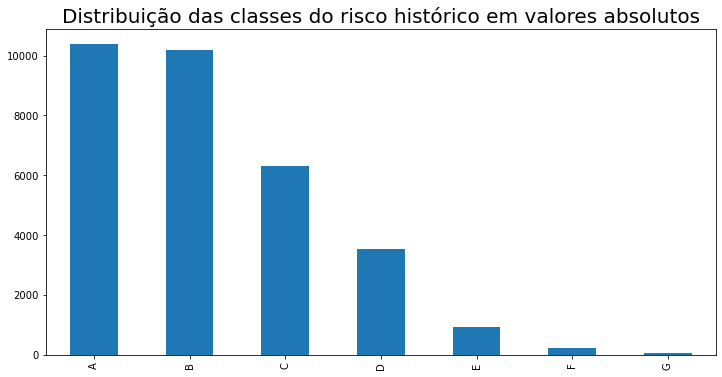

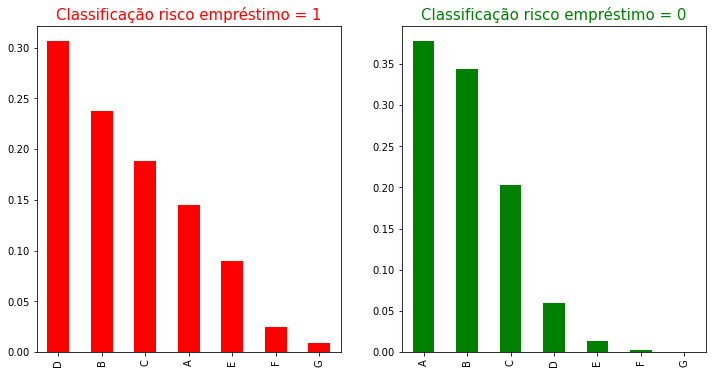

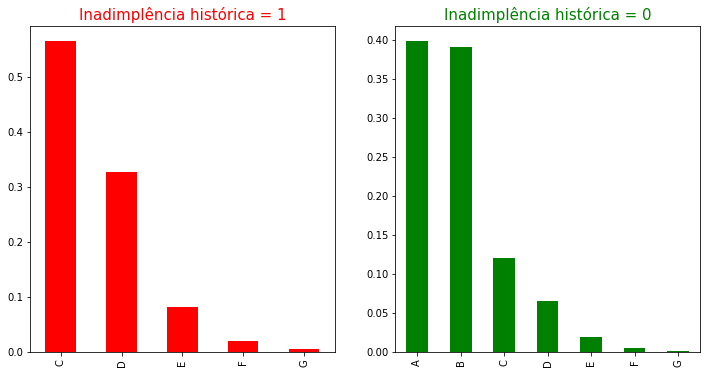

In [ ]:
df.class_risco_historico.value_counts().plot(kind='bar',figsize=(12,6))
plt.title('Distribuição das classes do risco histórico em valores absolutos',fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15,color='red')

df[df['risco_emprestimo'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15,color='green')



fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['inadimplencia_hist'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Inadimplência histórica = 1',fontsize=15,color='red')

df[df['inadimplencia_hist'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Inadimplência histórica = 0',fontsize=15,color='green')

plt.show()

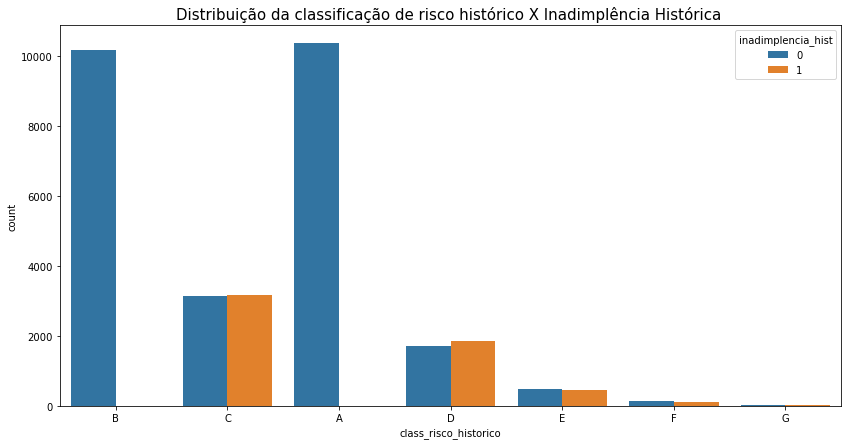

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x='class_risco_historico',hue='inadimplencia_hist', data = df)
ax.set_title('Distribuição da classificação de risco histórico X Inadimplência Histórica ',fontsize=15)
ax=ax

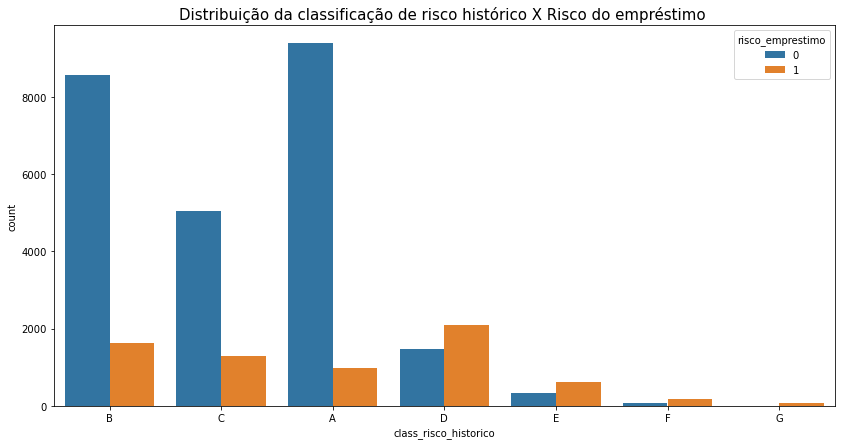

In [ ]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x='class_risco_historico',hue='risco_emprestimo', data = df)
ax.set_title('Distribuição da classificação de risco histórico X Risco do empréstimo ',fontsize=15)
ax=ax

Analisando os graficos acimas podemos concluir que:

  Quem pertence a classe A ou classe B pode ser considerado como bom pagador, já que não tem histórico de inadimplência.
  
  Quem pertence a classe C  está fortemente relacionado a ter um histórico de inadimplência.
  
  Quem pertence a classe D está fortemente relacionado a empréstimo de risco.
  
  Existem poucos registros da classes E,F e G, mas pode-se concluir que quem pertence a classe E está mais ligada a empréstimos de risco e a um histórico de inadimplência.
  
  Quem pertence a classe F ou classe G está associado a  empréstimo de risco.  